# Business Bank D&A
# Data Science Workshop 2 : Feature Engineering

<img src = "https://miro.medium.com/max/1400/1*RiEfzta7FkYiRq44jhSb7g.png" width = "650" >


## Titanic Dataset Example:

Can we predict if someone would have survived the Titanic Disaster?

#### Variable Meanings:

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**For Variable We Will:**

1. Assess missing values and replace them.

2. Apply various feature engineering techniques to create a dataset on which we can train our classification model.


In [1]:
#import dependencies 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Load Dataset 

titanic = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\titanic.csv')
titanic = titanic.replace('?', np.nan)
#assess variables

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   name      1309 non-null   object
 3   sex       1309 non-null   object
 4   age       1046 non-null   object
 5   sibsp     1309 non-null   int64 
 6   parch     1309 non-null   int64 
 7   fare      1308 non-null   object
 8   cabin     295 non-null    object
 9   embarked  1307 non-null   object
dtypes: int64(4), object(6)
memory usage: 102.4+ KB


### Starting with the Categorical Variables:

#### 1. pclass:

In [3]:
#Assess missing data

titanic['pclass'].isnull().mean()*100


0.0

PClass is not missing any data. 

Next we will assess how the class of the passenger, affects there chances of survival:

Text(0, 0.5, 'Survival Chance')

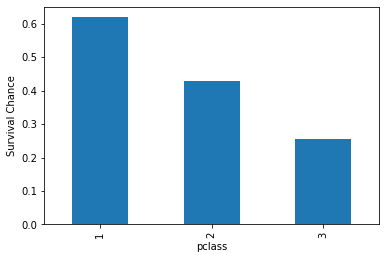

In [4]:
titanic_group = titanic.groupby(['pclass'])['survived'].mean()
titanic_group.plot.bar()
plt.ylabel('Survival Chance')

<p>The above visual shows that the class the passenger was traveling in plays a large role on the outcome of there survival. </p>
<p>Since PClass contains no missing values, and the feature already has a liner relationship with the response variable, we will take no further action. </p>

#### 2. Sex

In [5]:
#Assess missing data

titanic['sex'].isnull().mean()*100


0.0

Sex is not missing any data. 

Next we will assess how the gender of the passenger, affects there chances of survival:

Text(0, 0.5, 'Survival Chance')

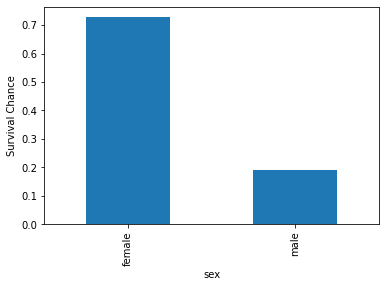

In [6]:
titanic_group = titanic.groupby(['sex'])['survived'].mean()
titanic_group.plot.bar()
plt.ylabel('Survival Chance')

The above graph shows that women had a far greater rate of survival than men. This means that this will be an important feature on which to train the model. 

Since gender, **in the 1920s**, was binary we can transform this field into a new feature simply indicating whether or not the passenger is female. 

In [7]:
#Calculate new field:

titanic['is_female'] = np.where(titanic['sex'] == 'female', 1, 0)

#view the new field

titanic.head()



,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.55,C22,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,151.55,C22,S,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.55,C22,S,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.55,C22,S,1


#### 3. Embarked


In [8]:
#Assess missing data

titanic['embarked'].isnull().mean()*100


0.15278838808250572

We can see that there is a very small percentage of data missing from the _embarked_ field. Since the percentage missing is less than 1%, we will simply impute the most common port of embarkation for these individuals. 

In [9]:
#view passengers with missing embarkation data:

titanic[titanic['embarked'].isnull() == True]


,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female
168,1,1,"Icard, Miss. Amelie",female,38,0,0,80,B28,NaN,1
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,80,B28,NaN,1


In [10]:
#impute most common port of embarkation
mode_embarked = (pd.DataFrame(titanic['embarked'].value_counts())).reset_index().iloc[0,0]
titanic['embarked'] = titanic['embarked'].fillna(mode_embarked)

titanic[titanic['embarked'].isnull() == True]

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female


Next lets evaluate if the port of embarkation had an effect on survival rates:

<AxesSubplot:xlabel='embarked'>

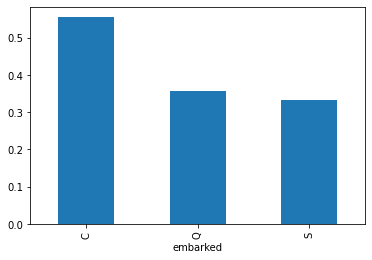

In [11]:
titanic_group = titanic.groupby(['embarked'])['survived'].mean()
titanic_group.plot.bar()

The above visual shows that us passengers who embarked from Port C had the greatest chance of survival, while passengers departing from Ports Q and S had a very similar chance of survival. 

Since the chances of the survival for the two groups are so similar, we can combine these two groups into a single group representing passengers embarking from Port Q and S. 

We can then transform this data into a binary representing whether or not the passenger embarked from Port C. 

In [12]:
#Calculate new field:

titanic['embarked_c'] = np.where(titanic['embarked'] == 'C', 1, 0)

#view the new field

titanic.head()



,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,211.3375,B5,S,1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.55,C22,S,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,151.55,C22,S,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.55,C22,S,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,151.55,C22,S,1,0


#### 4. Cabin

Cabin represents a unique problem as it is a _mixed variable_ containing both text and numbers. 

In [13]:
titanic['cabin'].unique()

array(['B5', 'C22 ', 'E12', 'D7', 'A36', 'C101', nan, 'C62 ', 'B35',
       'A23', 'B58 ', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 ', 'B96 ', 'C46', 'E31', 'E8', 'B61',
       'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22',
       'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20',
       'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23 ',
       'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130',
       'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125', 'D10 ', 'B82 ',
       'E50', 'D33', 'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46',
       'C39', 'B18', 'D11', 'C93', 'B28', 'C49', 'B52 ', 'E60', 'C132',
       'B37', 'D21', 'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9',
       'B80', 'C106', 'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30',
       'C118', 'D36', 'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24',
    

However if we assess the values of the cabin field within the context of a ship, we can decipher that the letter indicates the level of the ship the cabin was on. 

Using logic, we can assume that the ship level will be more important in determining survivability than the room number, so we will exract and store this value. 

In [14]:
titanic['cabin_level'] = titanic['cabin'].str[0]

titanic.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_level
768,3,0,"Denkoff, Mr. Mitto",male,NaN,0,0,7.8958,NaN,S,0,0,NaN
492,2,1,"Mallet, Master. Andre",male,1,0,2,37.0042,NaN,C,0,1,NaN
681,3,0,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,15.2458,NaN,C,1,1,NaN
619,3,0,"Allum, Mr. Owen George",male,18,0,0,8.3,NaN,S,0,0,NaN
255,1,1,"Sagesser, Mlle. Emma",female,24,0,0,69.3,B35,C,1,1,B
52,1,0,"Carrau, Mr. Francisco M",male,28,0,0,47.1,NaN,S,0,0,NaN
1047,3,1,"Najib, Miss. Adele Kiamie 'Jane'",female,15,0,0,7.225,NaN,C,1,1,NaN
1182,3,1,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,7.65,NaN,S,1,0,NaN
530,2,0,"Pengelly, Mr. Frederick William",male,19,0,0,10.5,NaN,S,0,0,NaN
334,2,0,"Banfield, Mr. Frederick James",male,28,0,0,10.5,NaN,S,0,0,NaN


Now we can assess how we will handle the missing values:

In [15]:
#Assess amount of missing data

titanic['cabin_level'].isnull().mean()*100


77.46371275783041

We can see that the cabin field is missing large proportion of data > 75%. 

Since we are missing such a large proportion, we should assess whether the missing data could imply something about the response variable.

In [16]:
#check survivability for missing cabin

overall_survival = titanic['survived'].mean() * 100
missing_cabin_survibal = titanic[titanic['cabin_level'].isnull() == True]['survived'].mean()

print(f'Overall Survival Rate: {overall_survival}')
print(f'Missing Cabin Survival Rate: {missing_cabin_survibal}')

Overall Survival Rate: 38.19709702062643
Missing Cabin Survival Rate: 0.3027613412228797


The above result shows that for passengers who did not survive, there cabins were not recorded leading to the missing data that we are seeing. 

Based on this, the fact that the cabin data is missing is an important feature on which to train our model, hence we will replace the missing cabin values with the word "missing" to indicate missing data. 

In [17]:
titanic['cabin_level'] = titanic['cabin_level'].fillna('missing')

titanic.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_level
316,1,0,"Williams, Mr. Charles Duane",male,51,0,1,61.3792,NaN,C,0,1,missing
328,2,0,"Angle, Mr. William A",male,34,1,0,26,NaN,S,0,0,missing
870,3,1,"Honkanen, Miss. Eliina",female,27,0,0,7.925,NaN,S,1,0,missing
312,1,0,"Widener, Mr. George Dunton",male,50,1,1,211.5,C80,C,0,1,C
192,1,1,"Lurette, Miss. Elise",female,58,0,0,146.5208,B80,C,1,1,B
897,3,0,"Johnson, Mr. Malkolm Joackim",male,33,0,0,7.775,NaN,S,0,0,missing
1102,3,0,"Panula, Master. Juha Niilo",male,7,4,1,39.6875,NaN,S,0,0,missing
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,151.55,C22,S,0,0,C
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,77.9583,D7,S,1,0,D
112,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,263,C23,S,1,0,C


Lastly since we cannot input the string values for cabin_level into our model, we will replace these values with the mean survival rate for that category to induce a linear relationship between the cabin level and our reponse variable.

In [18]:
#create dictionary of means for each cabin level

cabin_dict = titanic.groupby(['cabin_level'])['survived'].mean().to_dict()

#map dictionary to titanic dataframe

titanic['cabin_mean'] = titanic['cabin_level'].map(cabin_dict)

titanic.drop(['cabin_level'], inplace = True, axis= 1)

titanic.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean
562,2,1,"Slayter, Miss. Hilda Mary",female,30,0,0,12.35,NaN,Q,1,0,0.302761
726,3,0,"Connolly, Miss. Kate",female,30,0,0,7.6292,NaN,Q,1,0,0.302761
1270,3,0,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,9.5,NaN,S,0,0,0.302761
832,3,0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,1,6,46.9,NaN,S,1,0,0.302761
86,1,1,"Daly, Mr. Peter Denis",male,51,0,0,26.55,E17,S,0,0,0.731707
1147,3,0,"Riihivouri, Miss. Susanna Juhantytar 'Sanni'",female,22,0,0,39.6875,NaN,S,1,0,0.302761
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63,0,0,9.5875,NaN,S,1,0,0.302761
1049,3,1,"Nakid, Mr. Sahid",male,20,1,1,15.7417,NaN,C,0,1,0.302761
1011,3,0,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19,1,0,16.1,NaN,S,1,0,0.302761
753,3,0,"Davies, Mr. Evan",male,22,0,0,8.05,NaN,S,0,0,0.302761


Text(0, 0.5, 'Survival Rate')

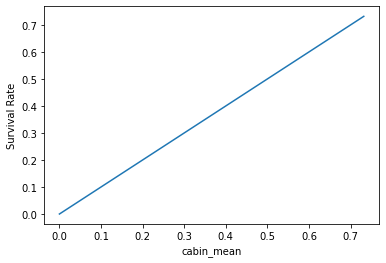

In [19]:
#Assess linear relationship of cabin_mean and survived

titanic.groupby(['cabin_mean'])['survived'].mean().plot.line()
plt.ylabel('Survival Rate')

### Now lets look at the numeric variables:

#### 1. Sibsp

First we will assess the relationship between sibsp and survival

Text(0, 0.5, 'Survival Rate')

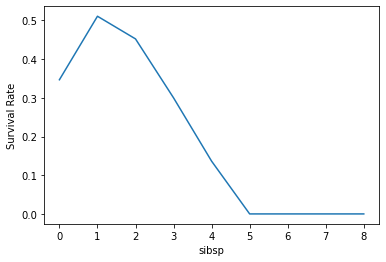

In [20]:
titanic.groupby(['sibsp'])['survived'].mean().plot.line()
plt.ylabel('Survival Rate')

We can see that a non-linear relationship exists between _sibsp_ and the survival rate. This implies that this feature may a good candidate for bucketing. 

However the small range of _sibsp_ and skewed distribution of the data will lead to imbalanced buckets.

In [21]:
titanic_grouped = titanic['sibsp'].value_counts()
titanic_grouped

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

The same problem can be seen _parch_:

In [22]:
titanic_grouped = titanic['parch'].value_counts()
titanic_grouped

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

However we can use both of these features in combination to infer a new feature describing the way in which the passenger travelled. 

We will apply the following rules:

| **parch** 	| **sibsp** 	| **travel_group** 	|
|---	|---	|---	|
| = 0 	| = 0 	| Alone 	|
| > 0 	| > 0 	| Family 	|
| = 0 	| > 0 	| Couple 	|

In [23]:
#add new field to titanic dataframe

def add_group(titanic):
    parch = titanic[0]
    sibsp = titanic[1]
    
    if (parch == 0) & (sibsp == 0):
        return 'alone'
    elif (parch == 0) & (sibsp > 0):
        return 'couple'
    else:
        return 'family'

titanic['travel_group'] = titanic[['parch', 'sibsp']].apply(add_group, axis = 1)
titanic.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group
1237,3,0,"Svensson, Mr. Olof",male,24,0,0,7.7958,NaN,S,0,0,0.302761,alone
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,151.55,C22,S,1,0,0.606383,family
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,7.75,NaN,Q,0,0,0.302761,alone
661,3,1,"Badman, Miss. Emily Louisa",female,18,0,0,8.05,NaN,S,1,0,0.302761,alone
1308,3,0,"Zimmerman, Mr. Leo",male,29,0,0,7.875,NaN,S,0,0,0.302761,alone
502,2,1,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41,0,1,19.5,NaN,S,1,0,0.302761,family
554,2,0,"Schmidt, Mr. August",male,26,0,0,13,NaN,S,0,0,0.302761,alone
1218,3,0,"Somerton, Mr. Francis William",male,30,0,0,8.05,NaN,S,0,0,0.302761,alone
32,1,1,"Bonnell, Miss. Caroline",female,30,0,0,164.8667,C7,S,1,0,0.606383,alone
1164,3,0,"Saad, Mr. Amin",male,NaN,0,0,7.2292,NaN,C,0,1,0.302761,alone


Text(0, 0.5, 'Surival Rate')

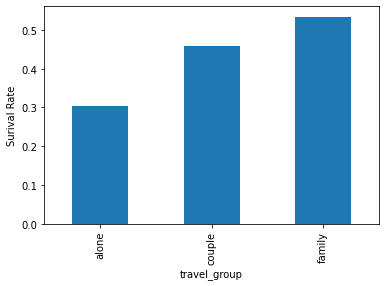

In [24]:
#Assess survival rates for different travel groups

titanic.groupby(['travel_group'])['survived'].mean().plot.bar()
plt.ylabel('Surival Rate')

We can see that the group in which the passengers played a role in determining their survival. 

Next we will use mean value in encoding once again to induce a linear relationship between our engineered feature and the result. 

In [25]:
#create dictionary of means for each cabin level

cabin_dict = titanic.groupby(['travel_group'])['survived'].mean().to_dict()

#map dictionary to titanic dataframe

titanic['travel_group_mean'] = titanic['travel_group'].map(cabin_dict)

#We can drop the 3 variables we will no longer use

titanic.drop(['travel_group'], inplace = True, axis= 1)

titanic.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean
740,3,0,"Culumovic, Mr. Jeso",male,17,0,0,8.6625,NaN,S,0,0,0.302761,0.302532
578,2,0,"Ware, Mr. John James",male,30,1,0,21,NaN,S,0,0,0.302761,0.457547
793,3,0,"Elsbury, Mr. William James",male,47,0,0,7.25,NaN,S,0,0,0.302761,0.302532
978,3,1,"Lulic, Mr. Nikola",male,27,0,0,8.6625,NaN,S,0,0,0.302761,0.302532
1288,3,0,"Wiklund, Mr. Jakob Alfred",male,18,1,0,6.4958,NaN,S,0,0,0.302761,0.457547
791,3,0,"Elias, Mr. Joseph Jr",male,17,1,1,7.2292,NaN,C,0,1,0.302761,0.534202
644,3,0,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40,1,5,31.3875,NaN,S,0,0,0.302761,0.534202
983,3,0,"MacKay, Mr. George William",male,NaN,0,0,7.55,NaN,S,0,0,0.302761,0.302532
474,2,0,"Kvillner, Mr. Johan Henrik Johannesson",male,31,0,0,10.5,NaN,S,0,0,0.302761,0.302532
1007,3,1,"McGowan, Miss. Anna 'Annie'",female,15,0,0,8.0292,NaN,Q,1,0,0.302761,0.302532


We have no reduced the numbers of features on which the model is required to learn on. 

#### 2. Age

In [26]:
#assess missing data 
titanic['age'] = titanic['age'].astype(float)
titanic['age'].isnull().mean()*100


20.091673032849503

In [27]:
#check survivability for missing cabin

overall_survival = titanic['survived'].mean() * 100
missing_cabin_survibal = titanic[titanic['age'].isnull() == True]['survived'].mean()

print(f'Overall Survival Rate: {overall_survival}')
print(f'Missing Cabin Survival Rate: {missing_cabin_survibal}')

Overall Survival Rate: 38.19709702062643
Missing Cabin Survival Rate: 0.27756653992395436


Text(0, 0.5, 'Survival Rate')

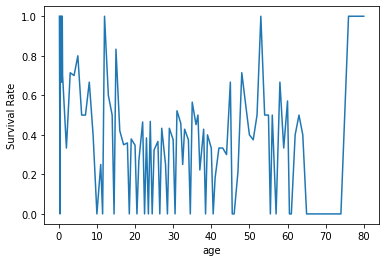

In [28]:
titanic.groupby(['age'])['survived'].mean().plot.line()
plt.ylabel('Survival Rate')

The _age_ feature also has a lot of missing data and much like the missing the cabin data, the fact that data is missing represents an important feature in determining survivability. 

This fact, coupled with the wide range of age data means that we can bucket the data, with a specific bucket for missing data.


In [29]:
#create temp variable to store missing status 

titanic['missing_age'] = np.where(titanic['age'].isnull() == True, 1, 0)

#split the data into 2 dataframes  
titanic_age = titanic[titanic['missing_age'] == 0]
titanic_no_age = titanic[titanic['missing_age'] == 1]

#create new field which splits age into 5 bins
titanic_age['age_bins'] = pd.qcut(titanic['age'], q = 5, duplicates='drop')

#add a missing bucket to the records with no age
titanic_no_age['age_bins'] = 'missing'

#rejoin the datasets

titanic = titanic_age.append( titanic_no_age, ignore_index = True)

titanic.sample(10)


,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean,missing_age,age_bins
1306,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,7.225,NaN,C,0,1,0.302761,0.302532,1,missing
321,2,1,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29,NaN,S,0,0,0.302761,0.534202,0,"(25.0, 31.0]"
885,3,0,"Niklasson, Mr. Samuel",male,28.0,0,0,8.05,NaN,S,0,0,0.302761,0.302532,0,"(25.0, 31.0]"
784,3,0,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,7.2292,NaN,C,0,1,0.302761,0.302532,0,"(25.0, 31.0]"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3,B35,C,1,1,0.723077,0.302532,0,"(19.0, 25.0]"
247,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,55.4417,C116,C,1,1,0.606383,0.457547,0,"(42.0, 80.0]"
687,3,0,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,14.4,NaN,S,0,0,0.302761,0.534202,0,"(31.0, 42.0]"
1257,3,0,"Sadlier, Mr. Matthew",male,NaN,0,0,7.7292,NaN,Q,0,0,0.302761,0.302532,1,missing
1186,3,1,"McCoy, Miss. Agnes",female,NaN,2,0,23.25,NaN,Q,1,0,0.302761,0.457547,1,missing
829,3,1,"Krekorian, Mr. Neshan",male,25.0,0,0,7.2292,F E5,C,0,1,0.619048,0.302532,0,"(19.0, 25.0]"


We can look at the age buckets that we have created:

In [30]:
titanic['age_bins'].unique()

array([Interval(25.0, 31.0, closed='right'),
       Interval(0.166, 19.0, closed='right'),
       Interval(19.0, 25.0, closed='right'),
       Interval(42.0, 80.0, closed='right'),
       Interval(31.0, 42.0, closed='right'), 'missing'], dtype=object)

Next we can use mean value encoding to induce a linear relationship between the age categories and the survival rate:

In [31]:
titanic_group = titanic.groupby(['age_bins'])['survived'].mean().to_dict()

titanic['age_mean'] = titanic['age_bins'].map(titanic_group)

titanic.drop(['age'],inplace = True, axis = 1)

titanic.sample(10)

,pclass,survived,name,sex,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean,missing_age,age_bins,age_mean
402,2,0,"Hiltunen, Miss. Marta",female,1,1,13,NaN,S,1,0,0.302761,0.534202,0,"(0.166, 19.0]",0.471111
217,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,1,0,59.4,NaN,C,1,1,0.302761,0.457547,0,"(42.0, 80.0]",0.420513
986,3,0,"Strandberg, Miss. Ida Sofia",female,0,0,9.8375,NaN,S,1,0,0.302761,0.302532,0,"(19.0, 25.0]",0.376147
650,3,0,"Carver, Mr. Alfred John",male,0,0,7.25,NaN,S,0,0,0.302761,0.302532,0,"(25.0, 31.0]",0.376963
429,2,0,"Kvillner, Mr. Johan Henrik Johannesson",male,0,0,10.5,NaN,S,0,0,0.302761,0.302532,0,"(25.0, 31.0]",0.376963
766,3,0,"Hansen, Mr. Henrik Juul",male,1,0,7.8542,NaN,S,0,0,0.302761,0.457547,0,"(25.0, 31.0]",0.376963
1222,3,1,"O'Brien, Mrs. Thomas (Johanna 'Hannah' Godfrey)",female,1,0,15.5,NaN,Q,1,0,0.302761,0.457547,1,missing,0.277567
732,3,0,"Ford, Miss. Doolina Margaret 'Daisy'",female,2,2,34.375,NaN,S,1,0,0.302761,0.534202,0,"(19.0, 25.0]",0.376147
150,1,1,"Ismay, Mr. Joseph Bruce",male,0,0,0,B52,S,0,0,0.723077,0.302532,0,"(42.0, 80.0]",0.420513
663,3,0,"Connaghton, Mr. Michael",male,0,0,7.75,NaN,Q,0,0,0.302761,0.302532,0,"(25.0, 31.0]",0.376963


#### 4. Fare

In [32]:
#Assess missing data 

titanic['fare'].isnull().mean()*100


0.07639419404125286

In [33]:
titanic[titanic['fare'].isnull() == True]

,pclass,survived,name,sex,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean,missing_age,age_bins,age_mean
984,3,0,"Storey, Mr. Thomas",male,0,0,NaN,NaN,S,0,0,0.302761,0.302532,0,"(42.0, 80.0]",0.420513


There appears to be only one record where the fare has not been recorded. 

If we assume that a passenger's fare is dependent on their travel class as well as their port of departure, we can infer the fare he would have paid based on the fare paid other passengers in the same category. 

In [43]:
#Calculate mean for third class passengers travelling from Southhampton
titanic['fare'] = titanic['fare'].astype(float)
mean = titanic[(titanic['pclass'] == 3) & (titanic['embarked'] == 'S')]['fare'].mean()

titanic['fare'].fillna(mean, inplace = True)

titanic[titanic['fare'].isnull() == True]

,pclass,survived,name,sex,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean,missing_age,age_bins,age_mean


Next we can assess the range of values in the fare field:

In [57]:
range = (max(titanic['fare'])) - (min(titanic['fare']))
print(titanic['fare'].unique())
print(f"Range of fares paid: {range}")

[211.3375     151.55        26.55        77.9583       0.
  51.4792      49.5042     227.525       69.3         78.85
  30.         247.5208      76.2917      75.2417      52.5542
 221.7792      26.          91.0792     135.6333      35.5
  31.         164.8667     262.375       55.          30.5
  50.4958      27.7208     134.5         26.2875      27.4458
 512.3292       5.          47.1        120.          61.175
  53.1         86.5         29.7        136.7792      25.5875
  83.1583      25.7         71.          71.2833      52.
  57.          81.8583     106.425       39.6         56.9292
  78.2667      31.6792      26.3875      27.75       263.
 133.65        49.5         79.2         38.5        211.5
  59.4         89.1042      34.6542      28.5        153.4625
  63.3583      55.4417      76.7292      83.475       93.5
  42.5         50.          57.9792      90.          80.
  28.7125      51.8625      25.9292      39.4         45.5
 146.5208      82.1708      57.75        4

The large range of the fares paid represent a problem due to the fact that the other features we have created have a far smaller range, usually between 0 & 1. 

The large differences in scale between input features will cause a problem for our ML model and may affect the performance of the classifier. 

In order to prevent this, we will scale the feature using the min-max scaler method:

**Scaled = (Feature Value - Min Value) / Max Value**

This will scale all the values between 0 & 1.

In [58]:
titanic['scaled_fare'] = (titanic['fare'] - min(titanic['fare'])) / max(titanic['fare'])

titanic.sample(10)

,pclass,survived,name,sex,sibsp,parch,fare,cabin,embarked,is_female,embarked_c,cabin_mean,travel_group_mean,missing_age,age_bins,age_mean,scaled_fare
1192,3,0,"McMahon, Mr. Martin",male,0,0,7.750,NaN,Q,0,0,0.302761,0.302532,1,missing,0.277567,0.015127
219,1,1,"Ryerson, Master. John Borie",male,2,2,262.375,B57,C,0,1,0.723077,0.534202,0,"(0.166, 19.0]",0.471111,0.512122
94,1,1,"Endres, Miss. Caroline Louise",female,0,0,227.525,C45,C,1,1,0.606383,0.302532,0,"(31.0, 42.0]",0.391705,0.444099
571,3,0,"Andersson, Miss. Ida Augusta Margareta",female,4,2,7.775,NaN,S,1,0,0.302761,0.534202,0,"(31.0, 42.0]",0.391705,0.015176
564,3,0,"Allum, Mr. Owen George",male,0,0,8.300,NaN,S,0,0,0.302761,0.302532,0,"(0.166, 19.0]",0.471111,0.016201
1299,3,0,"Ware, Mr. Frederick",male,0,0,8.050,NaN,S,0,0,0.302761,0.302532,1,missing,0.277567,0.015713
22,1,1,"Bidois, Miss. Rosalie",female,0,0,227.525,NaN,C,1,1,0.302761,0.302532,0,"(31.0, 42.0]",0.391705,0.444099
1175,3,1,"Madigan, Miss. Margaret 'Maggie'",female,0,0,7.750,NaN,Q,1,0,0.302761,0.302532,1,missing,0.277567,0.015127
51,1,1,"Carter, Miss. Lucile Polk",female,1,2,120.000,B96,S,1,0,0.723077,0.534202,0,"(0.166, 19.0]",0.471111,0.234224
1236,3,0,"Peduzzi, Mr. Joseph",male,0,0,8.050,NaN,S,0,0,0.302761,0.302532,1,missing,0.277567,0.015713


We can now look at our new dataset containing only our engineered features:

In [60]:
titanic_features = titanic[['pclass', 'is_female', 'embarked_c', 'cabin_mean', 'travel_group_mean', 'age_mean', 'scaled_fare', 'survived']]

titanic_features.sample(5)

,pclass,is_female,embarked_c,cabin_mean,travel_group_mean,age_mean,scaled_fare,survived
46,1,1,1,0.723077,0.534202,0.420513,1.000000,1
1076,1,0,0,0.606383,0.302532,0.277567,0.059532,1
289,2,0,0,0.302761,0.457547,0.391705,0.050749,0
1020,3,1,0,0.302761,0.457547,0.471111,0.035134,0
376,2,0,0,0.302761,0.457547,0.376147,0.022447,0


Now we can fit a classification model to our engineered features and test how well it performs.

We will fit a **Logistic Regression** model to the dataset. 

In [62]:
#import ML libraries 

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score


In [72]:
#split our data into training and test data

x = titanic_features.iloc[:,0:7]
y = titanic_features.iloc[:,7:8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

x_train

,pclass,is_female,embarked_c,cabin_mean,travel_group_mean,age_mean,scaled_fare
501,2,1,0,0.302761,0.302532,0.376147,0.020495
588,3,1,0,0.302761,0.534202,0.471111,0.061264
402,2,1,0,0.302761,0.534202,0.471111,0.025374
1193,3,1,0,0.302761,0.302532,0.277567,0.015127
686,3,0,0,0.302761,0.534202,0.471111,0.028107
...,...,...,...,...,...,...,...
763,3,0,0,0.302761,0.302532,0.376147,0.018543
835,3,0,0,0.302761,0.302532,0.376147,0.015176
1216,3,0,0,0.302761,0.302532,0.277567,0.015412
559,3,0,0,0.302761,0.302532,0.376963,0.015395


In [73]:
#fit logistic regressior model

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [80]:
#test the accuracy of the model

pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(f'Model Accuracy: {round(accuracy, 4) * 100.00}%')



Model Accuracy: 75.06%


Our first iteration of the mode produced an accuracy score of ~75%. 

We can also see the co-efficients the model has assigned to each input feature, allowing us to assess which features played a role in determining survival. 

Text(0, 0.5, 'Coefficient')

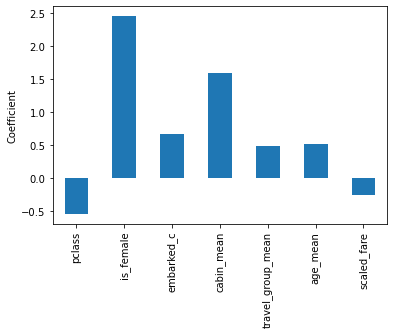

In [95]:
model_coef = pd.DataFrame(classifier.coef_, columns = ['pclass', 'is_female', 'embarked_c', 'cabin_mean', 'travel_group_mean', 'age_mean', 'scaled_fare'])
model_coef = model_coef.transpose()
model_coef.plot.bar(legend = False)
plt.ylabel('Coefficient')

Next lets attempt to improve the accuracy of our model, by tuning the model parameters using a gridsearch.

In [102]:
from sklearn.model_selection import GridSearchCV
#define parameter grid

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000, 10000]
    }
]

#define model

classifier2 = LogisticRegression(random_state = 0)

#perform gridsearch

clf = GridSearchCV(classifier2, param_grid = param_grid, cv = 6, verbose=True, n_jobs=-1)

best_clf = clf.fit(x_train,y_train)





Fitting 6 folds for each of 2000 candidates, totalling 12000 fits


In [107]:
y_pred = best_clf.predict(x_test)

accuracy_optimised = accuracy_score(y_test, y_pred) * 100 

print(f'Accuracy Score of Optimized Model: {round(accuracy_optimised, 4)}%')

Accuracy Score of Optimized Model: 79.6438%


By tuning the model to find the optimal parameters, we have increased the accuracy by ~4%

In [106]:
from sklearn.ensemble import RandomForestClassifier


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#define model

classifier3 = RandomForestClassifier(random_state = 0)

#perform gridsearch

clf = GridSearchCV(classifier3, param_grid = param_grid, cv = 6, verbose=True, n_jobs=-1)

best_clf = clf.fit(x_train,y_train)
y_pred = best_clf.predict(x_test)

accuracy_optimised = accuracy_score(y_test, y_pred) *100

print(f'Accuracy Score of Optimized Model: {round(accuracy_optimised, 4)}%')


Fitting 6 folds for each of 60 candidates, totalling 360 fits
Accuracy Score of Optimized Model: 79.6438%
